In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

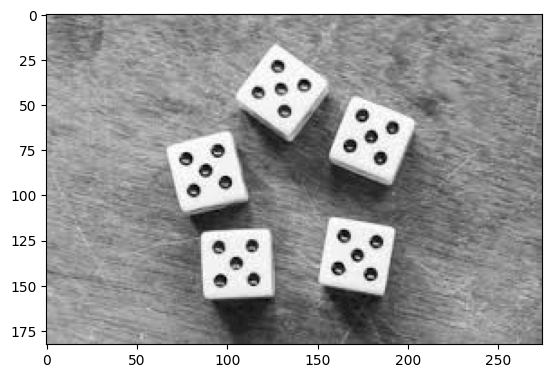

In [177]:
img = cv2.imread('Input/1.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray')
plt.show()

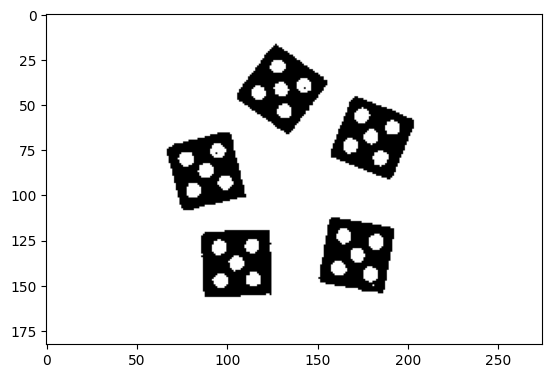

In [178]:
_,threshold = cv2.threshold(img,210,255,cv2.THRESH_BINARY)#210,210,150,90
threshold = 255 - threshold
plt.imshow(threshold,cmap='gray')
plt.show()

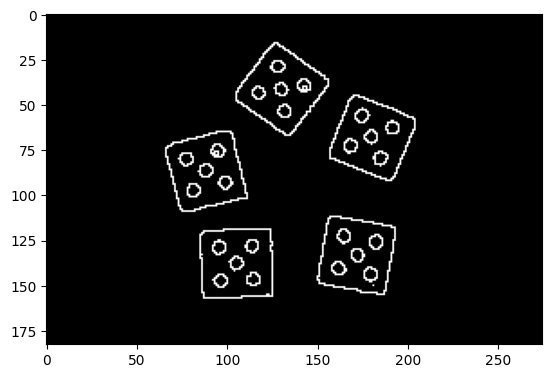

In [179]:
kernel = np.array([[-1 , -1 , -1],
                   [-1 ,  8 , -1],
                   [-1 , -1 , -1]])
filter = cv2.filter2D(threshold,-1,kernel)
plt.imshow(filter,cmap='gray')
plt.show()

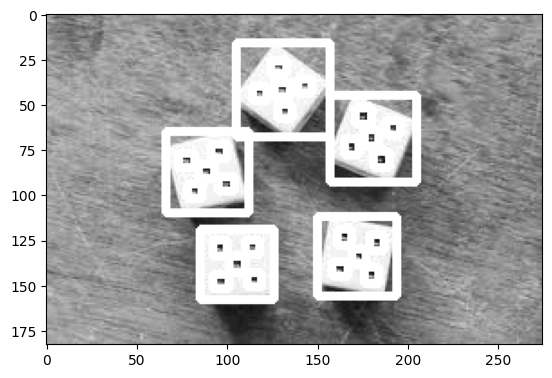

[[92, 144, 9, 8], [111, 143, 8, 8], [101, 134, 9, 9], [110, 125, 8, 8], [92, 125, 8, 9], [176, 140, 8, 9], [158, 137, 9, 8], [169, 130, 8, 8], [179, 122, 8, 9], [161, 119, 8, 9], [78, 94, 8, 8], [95, 90, 9, 8], [84, 83, 9, 8], [73, 77, 9, 8], [91, 72, 9, 8], [181, 76, 9, 9], [165, 69, 8, 9], [176, 64, 8, 9], [188, 59, 8, 8], [171, 52, 9, 9], [128, 50, 8, 8], [114, 40, 8, 8], [126, 38, 9, 8], [139, 36, 8, 8], [124, 26, 9, 7], [85, 119, 41, 39], [150, 112, 44, 44], [66, 65, 46, 45], [157, 45, 48, 48], [105, 16, 52, 52]]
30


In [184]:
contours_ex,_ =cv2.findContours(filter,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
contours_tr,_ =cv2.findContours(filter,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contourList = []
count_dot = 0
result = img.copy()

for contour in contours_tr:
    if cv2.contourArea(contour)>37 and cv2.contourArea(contour)<400 : #1-->37,400 ,#2-->1000,2000 , #3-->600,800 , #4-->200,1000
        x,y,w,h = cv2.boundingRect(contour)
        count_dot += 1
        contourList.append([x,y,w,h])
        cv2.rectangle(result,[x,y],[x+w,y+h],255,3)


count_dice = 0
for contour in contours_ex:
    if cv2.contourArea(contour)>600:
        x,y,w,h = cv2.boundingRect(contour)
        count_dice += 1
        contourList.append([x,y,w,h])
        cv2.rectangle(result,[x,y],[x+w,y+h],255,3)

plt.imshow(result,cmap='gray')
plt.show()
print(contourList)
print(len(contourList))

In [181]:
dices =np.zeros((1,count_dice))
for i in range(count_dice):
    x_dice , y_dice , w_dice , h_dice = contourList[len(contourList)-i-1]
    for j in range(count_dot):
        x_dot , y_dot , w_dot , h_dot = contourList[j]
        if (x_dot  >  x_dice) and (x_dot + w_dot <  x_dice + w_dice) and (y_dot  >  y_dice) and (y_dot + h_dot <  y_dice + h_dice):
                dices[0][i] += 1

print(dices)
    

[[5. 5. 5. 5. 5.]]


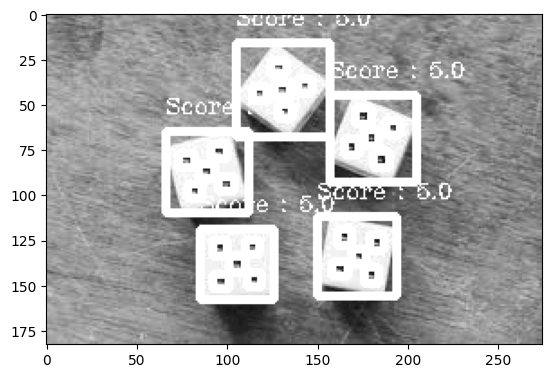

In [185]:
for i in range(count_dice):
    text = f"Score : {dices[0][i]}"
    point = [contourList[len(contourList)-i-1][0],contourList[len(contourList)-i-1][1]-10]
    cv2.putText(result,text,point,cv2.FONT_HERSHEY_COMPLEX,0.4,255)

plt.imshow(result,cmap='gray')
plt.show()

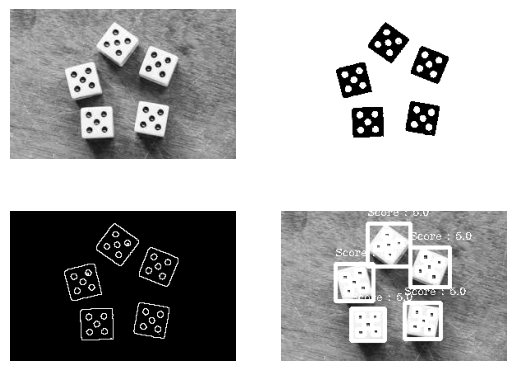

In [186]:
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(threshold,cmap='gray')
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(filter,cmap='gray')
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(result,cmap='gray')
plt.axis('off')
plt.show()